In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

In [26]:
gene = 'PTEN'
protList = ['PTEN']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for PTEN: 
Ttest_indResult(statistic=-2.747313953385987, pvalue=0.007151900902620795)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

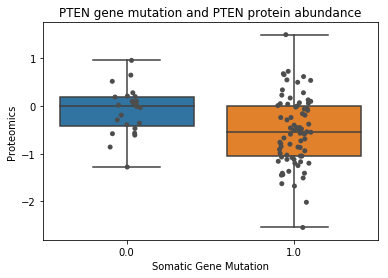

In [27]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

Analyze the protein abundance of PIK3CA with and without mutation 

In [51]:
gene = 'PIK3CA'
protList = ['PIK3CA']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for PIK3CA: 
Ttest_indResult(statistic=-2.3709474235794348, pvalue=0.019698800138688424)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

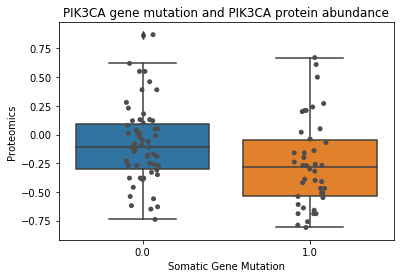

In [52]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

Exploring other protein abundances

In [42]:
gene = 'PIK3CA'
protList = ['RAS1']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

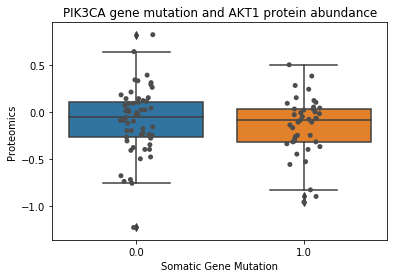

In [40]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

Phosphorylation Levels

In [53]:
phosProt = phos.filter(regex='PIK3CA') 
protein = 'PIK3CA'

proteindf = proteomics[protein].to_frame()
cross = proteindf.add(phosProt, fill_value=0)

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

for loc in cross.columns:
    if not loc == protein:
        oneSitedf = cross[[loc, protein]].dropna(axis=0)
        pearsonresult = pearsonr(oneSitedf[loc], oneSitedf[protein])
        print("Results for " + loc)
        print(pearsonresult)

0.016666666666666666
Results for PIK3CA-S312
(0.5841703913763756, 1.2823613810717801e-08)
Results for PIK3CA-T313
(0.6038385439463932, 2.4806540164348424e-08)


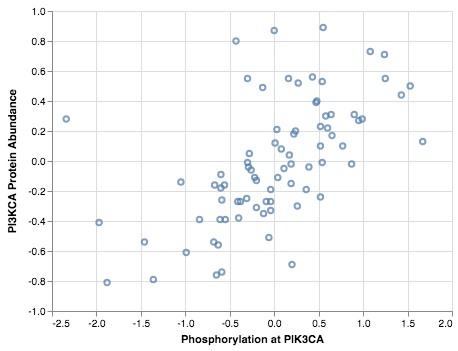

In [60]:
alt.Chart(cross).mark_point().encode(
    alt.X('PIK3CA-S312', type='quantitative', axis=alt.Axis(title="Phosphorylation at PIK3CA")),
    alt.Y('PIK3CA', type='quantitative', axis=alt.Axis(title="PI3KCA Protein Abundance"))
)